## Tips Prediction 

 (First ML Prediction using Linear Regression)

### Import all libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the tips dataset 

In [2]:
df=sns.load_dataset('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Data Overview

In [4]:
df.shape

(244, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Checking for Missing data

In [7]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## Data Visualization

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

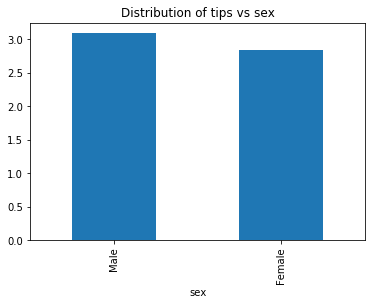

In [8]:
df.groupby(['sex'])['tip'].mean().plot(kind='bar', title='Distribution of tips vs sex')
df.groupby(['sex'])['tip'].mean()

smoker
Yes    3.008710
No     2.991854
Name: tip, dtype: float64

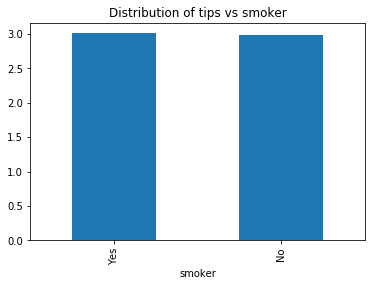

In [9]:
df.groupby(['smoker'])['tip'].mean().plot(kind='bar', title='Distribution of tips vs smoker')
df.groupby(['smoker'])['tip'].mean()

day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

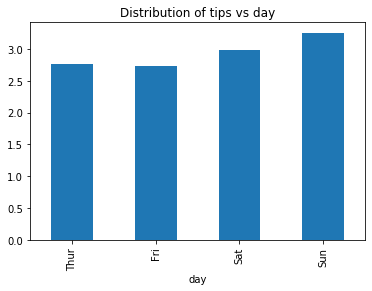

In [10]:
df.groupby(['day'])['tip'].mean().plot(kind='bar', title='Distribution of tips vs day')
df.groupby(['day'])['tip'].mean()

time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64

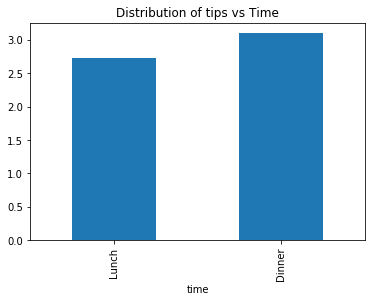

In [11]:
df.groupby(['time'])['tip'].mean().plot(kind='bar', title='Distribution of tips vs Time')
df.groupby(['time'])['tip'].mean()

In [12]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


### Feature Engineering

#### Handling Sex Feature

In [13]:
df.sex.unique()

['Female', 'Male']
Categories (2, object): ['Female', 'Male']

In [14]:
df['sex'] = df.sex.map({'Male': 0, 'Female': 1})

In [15]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,No,Sun,Dinner,2
1,10.34,1.66,0,No,Sun,Dinner,3
2,21.01,3.50,0,No,Sun,Dinner,3
3,23.68,3.31,0,No,Sun,Dinner,2
4,24.59,3.61,1,No,Sun,Dinner,4


#### Handling Smoker Feature

In [16]:
df.smoker.unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [17]:
df['smoker'] = df.smoker.map({'No': 0, 'Yes': 1})

In [18]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,Sun,Dinner,2
1,10.34,1.66,0,0,Sun,Dinner,3
2,21.01,3.50,0,0,Sun,Dinner,3
3,23.68,3.31,0,0,Sun,Dinner,2
4,24.59,3.61,1,0,Sun,Dinner,4


#### Handling Time Feature

In [19]:
df.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Dinner', 'Lunch']

In [20]:
df['time'] = df.time.map({'Dinner': 0, 'Lunch': 1})

In [21]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,Sun,0,2
1,10.34,1.66,0,0,Sun,0,3
2,21.01,3.50,0,0,Sun,0,3
3,23.68,3.31,0,0,Sun,0,2
4,24.59,3.61,1,0,Sun,0,4


#### Handling day Feature

In [22]:
df.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

In [23]:
days = pd.get_dummies(df.day, drop_first=True)
df = pd.concat([df,days],axis=1)
df.drop(['day'], axis = 1, inplace=True)

In [24]:
df.head()

,total_bill,tip,sex,smoker,time,size,Fri,Sat,Sun
0,16.99,1.01,1,0,0,2,0,0,1
1,10.34,1.66,0,0,0,3,0,0,1
2,21.01,3.50,0,0,0,3,0,0,1
3,23.68,3.31,0,0,0,2,0,0,1
4,24.59,3.61,1,0,0,4,0,0,1


In [25]:
X = df[[X for X in df.columns if X not in 'tip']]
Y = df[['tip']]

In [26]:
X

,total_bill,sex,smoker,time,size,Fri,Sat,Sun
0,16.99,1,0,0,2,0,0,1
1,10.34,0,0,0,3,0,0,1
2,21.01,0,0,0,3,0,0,1
3,23.68,0,0,0,2,0,0,1
4,24.59,1,0,0,4,0,0,1
...,...,...,...,...,...,...,...,...
239,29.03,0,0,0,3,0,1,0
240,27.18,1,1,0,2,0,1,0
241,22.67,0,1,0,2,0,1,0
242,17.82,0,0,0,2,0,1,0


### Train Test Split Process

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,Y,test_size=0.3,random_state=26)

### Train with Linear Regression Model

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
y_pred=model.predict(X_test)

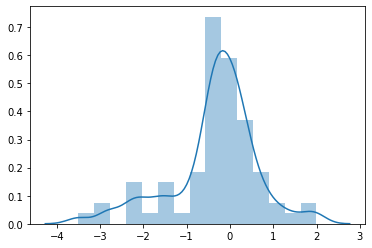

In [30]:
sns.distplot(y_test-y_pred)

## Prediction

In [31]:
X.columns

Index(['total_bill', 'sex', 'smoker', 'time', 'size', 'Fri', 'Sat', 'Sun'], dtype='object')

In [32]:
total_bill=20       ## Total Bill: $20
sex=1               ## 'Male': 0, 'Female': 1
smoker=1            ## 'No': 0, 'Yes': 1 
time=1              ## 'Dinner': 0 , 'Lunch': 1
size=2
Fri=0
Sat=1
Sun=0

pred_input = np.array([total_bill, sex, smoker, time, size, Fri, Sat, Sun]).reshape(1,-1)

In [33]:
model.predict(pred_input)

array([[3.19521802]])

### Prediction Result:  Our linear Regression Model is predicting : $3.19